In [1]:
import numpy as np
import pandas as pd

In [49]:
#Define the sequential data transformation
#Would work better on the pandas.DataFrame (Series-like) type of data
#Resources: #Resources: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_2_lstm.ipynb 

def to_sequential(data, seq_size):
    x = []
    y = []
    for i in range(len(data) - seq_size):
        first_window = data[i:(i + seq_size)]
        further_window = data[i + seq_size]
        #print(first_window)
        first_window = [[value] for value in first_window]
        x.append(first_window)
        y.append(further_window)
    return np.array(x), np.array(y).reshape(len(y), 1)
    #Series input into array: some data format issue occurs, so .reshape() is called to fix it into proper results.


In [4]:
#Create Demo dataset in dataframe type
b = pd.DataFrame({'Date':["2020-01-01", "2020-01-02", "2020-01-03", "2020-01-04", "2020-01-05", "2020-01-06",
                         "2020-01-07", "2020-01-08", "2020-01-09", "2020-01-10"],
                  'X':[1, 17, 34, 2, 23, 9, 18, 17, 30, 11]})
b

,Date,X
0,2020-01-01,1
1,2020-01-02,17
2,2020-01-03,34
3,2020-01-04,2
4,2020-01-05,23
5,2020-01-06,9
6,2020-01-07,18
7,2020-01-08,17
8,2020-01-09,30
9,2020-01-10,11


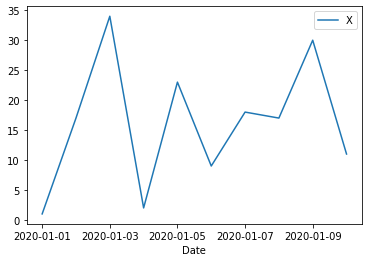

In [26]:
%matplotlib inline
b.plot(x = 'Date')

In [35]:
b_train = b[b['Date'] < "2020-01-07"]
b_train = b_train['X']
b_test = b[b['Date'] >= "2020-01-07"]
b_test = b_test['X']
print(b_train); print(b_test)

0     1
1    17
2    34
3     2
4    23
5     9
Name: X, dtype: int64
6    18
7    17
8    30
9    11
Name: X, dtype: int64


In [50]:
train_x_seq, train_y_seq = to_sequential(b_train, 1)
print(train_x_seq); print(train_y_seq)

[[[ 1]]

 [[17]]

 [[34]]

 [[ 2]]

 [[23]]]
[[17]
 [34]
 [ 2]
 [23]
 [ 9]]


In [51]:
print(train_x_seq.shape); print(train_y_seq.shape)

(5, 1, 1)
(5, 1)


In [16]:
def to_sequences(SEQUENCE_SIZE, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [22]:
train_x_seq, train_y_seq = to_sequences(1, b_train)
print(train_x_seq); print(train_y_seq)
print(train_x_seq.shape); print(train_y_seq.shape)

[[[ 1]]

 [[17]]

 [[34]]

 [[ 2]]

 [[23]]]
[17 34  2 23  9]
(5, 1, 1)
(5,)
